In [1]:
## I Wayan Rangga RIjasa - 0706022210019
## Mario Giancarlo Cahyadi - 0706022210020

In [2]:
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

In [3]:
pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)

In [4]:
df = pd.read_excel('https://github.com/RanggaRijasa/DataMining2024/raw/refs/heads/main/customer_analysis.xlsx')
df.head(11)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [5]:
unique_values1 = df["Education"].unique()
print(unique_values1)
unique_values2 = df["Marital_Status"].unique()
print(unique_values2)

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
df.drop(['ID', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [9]:
df.fillna(df.mean(numeric_only=True), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
df.head(11)

C:\Users\Rangga R\AppData\Local\Temp\ipykernel_8136\1682143388.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
5,1967,Master,Together,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
6,1971,Graduation,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0
7,1985,PhD,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0
8,1974,PhD,Together,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1
9,1950,PhD,Together,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0


In [10]:
df.isnull().sum()

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [11]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
## Cleaning inconsistent values

# Mapping Education values
education_mapping = {
    "Graduation": "Undergraduate",
    "PhD": "Doctorate",
    "Master": "Postgraduate",
    "Basic": "High School",
    "2n Cycle": "Undergraduate"
}

# Replace values
df["Education"] = df["Education"].replace(education_mapping)

# Mapping Marital Status values
marital_status_mapping = {
    "Single": "Single",
    "Together": "In a Relationship",
    "Married": "Married",
    "Divorced": "Divorced",
    "Widow": "Widowed",
    "Alone": "Single",
    "Absurd": None,  # Mark as missing for now
    "YOLO": None  # Mark as missing for now
}

df["Marital_Status"] = df["Marital_Status"].replace(marital_status_mapping)

df = df.dropna(subset=["Marital_Status"])


In [13]:
## Mapped unique value confirmation

unique_values1 = df["Education"].unique()
print(unique_values1)
unique_values2 = df["Marital_Status"].unique()
print(unique_values2)
df.head(11)

['Undergraduate' 'Doctorate' 'Postgraduate' 'High School']
['Single' 'In a Relationship' 'Married' 'Divorced' 'Widowed']


,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Undergraduate,Single,58138.000000,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Undergraduate,Single,46344.000000,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Undergraduate,In a Relationship,71613.000000,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Undergraduate,In a Relationship,26646.000000,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,Doctorate,Married,58293.000000,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
5,1967,Postgraduate,In a Relationship,62513.000000,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0
6,1971,Undergraduate,Divorced,55635.000000,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0
7,1985,Doctorate,Married,33454.000000,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0
8,1974,Doctorate,In a Relationship,30351.000000,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1
9,1950,Doctorate,In a Relationship,5648.000000,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0


In [14]:
# Convert Dt_Customer to numeric (days since registration)
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Days_Since_Customer"] = (pd.Timestamp("now") - df["Dt_Customer"]).dt.days

df.drop("Dt_Customer", axis=1, inplace=True)

education_encoder = LabelEncoder()
df["Education"] = education_encoder.fit_transform(df["Education"])

marital_status_encoder = LabelEncoder()
df["Marital_Status"] = marital_status_encoder.fit_transform(df["Marital_Status"])

## encoded uniqe value confirmation

print("Education encoded values:", education_encoder.classes_)
print("Marital_Status encoded values:", marital_status_encoder.classes_)

Education encoded values: ['Doctorate' 'High School' 'Postgraduate' 'Undergraduate']
Marital_Status encoded values: ['Divorced' 'In a Relationship' 'Married' 'Single' 'Widowed']


In [15]:
df.head(11)

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Since_Customer
0,1957,3,3,58138.000000,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,4467
1,1954,3,3,46344.000000,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,3917
2,1965,3,1,71613.000000,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,4116
3,1984,3,1,26646.000000,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,3943
4,1981,0,2,58293.000000,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,3965
5,1967,2,1,62513.000000,0,1,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,0,4097
6,1971,3,0,55635.000000,0,1,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,0,4397
7,1985,0,2,33454.000000,1,0,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,0,4221
8,1974,0,1,30351.000000,1,0,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,1,4192
9,1950,0,1,5648.000000,1,1,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,0,3912


In [16]:
## df.sample(20)

In [17]:
# Scaling the numeric columns using MinMaxScaler
columns_to_scale = [
    'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
    'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
    'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
    'NumStorePurchases', 'NumWebVisitsMonth'
]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[columns_to_scale])

scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)

In [18]:
## EDA

In [19]:
df.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Days_Since_Customer
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,1968.796512,2.137299,1.817979,52232.669066,0.444991,0.506261,49.147138,303.873435,26.271020,166.924419,37.405188,27.081395,43.880590,2.322898,4.082737,2.659213,5.789356,5.317531,0.072898,0.074687,0.072451,0.063953,0.013417,0.009392,0.148479,4157.335868
std,11.980604,1.210848,0.997742,25051.855737,0.538551,0.544615,28.954880,336.876776,39.761356,225.778550,54.436749,41.300943,51.979634,1.932052,2.779736,2.920752,3.253756,2.424756,0.260027,0.262944,0.259291,0.244725,0.115077,0.096477,0.355654,202.064179
min,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3804.000000
25%,1959.000000,2.000000,1.000000,35502.500000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3984.750000
50%,1970.000000,3.000000,2.000000,51741.500000,0.000000,0.000000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4159.000000
75%,1977.000000,3.000000,3.000000,68289.750000,1.000000,1.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4332.000000
max,1996.000000,3.000000,4.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4503.000000


In [20]:
summary = """
Income:
    - Average: ~52,233
    - Range: 1,730 (minimum) to 666,666 (maximum)
    - High variability (std = 25,051) suggests some outliers.

Kidhome & Teenhome:
    - Represent the number of kids and teens at home.
    - Most households have no kids or teens (median = 0).

MntWines, MntFruits, etc.:
    - Spending on products like wine, fruits, meat, etc.
    - Significant variation in spending (std values are high).
    - Many customers spent nothing on specific items (minimum = 0).

NumDealsPurchases, NumWebPurchases, etc.:
    - Purchase behaviors across various channels (store, catalog, web).
    - Median purchases are low, indicating many customers made few purchases.

Campaign Responses (AcceptedCmpX):
    - Binary columns (0 = did not accept, 1 = accepted).
    - Campaign success rates are low (mean ≈ 0.07).

Response:
    - Overall campaign response rate: ~14.85% (mean ≈ 0.148).

Days_Since_Customer:
    - Average: ~4154 days (~11 years), indicating customer loyalty or engagement longevity.
"""

# Print the summary
print(summary)


Income:
    - Average: ~52,233
    - Range: 1,730 (minimum) to 666,666 (maximum)
    - High variability (std = 25,051) suggests some outliers.

Kidhome & Teenhome:
    - Represent the number of kids and teens at home.
    - Most households have no kids or teens (median = 0).

MntWines, MntFruits, etc.:
    - Spending on products like wine, fruits, meat, etc.
    - Significant variation in spending (std values are high).
    - Many customers spent nothing on specific items (minimum = 0).

NumDealsPurchases, NumWebPurchases, etc.:
    - Purchase behaviors across various channels (store, catalog, web).
    - Median purchases are low, indicating many customers made few purchases.

Campaign Responses (AcceptedCmpX):
    - Binary columns (0 = did not accept, 1 = accepted).
    - Campaign success rates are low (mean ≈ 0.07).

Response:
    - Overall campaign response rate: ~14.85% (mean ≈ 0.148).

Days_Since_Customer:
    - Average: ~4154 days (~11 years), indicating customer loyalty or enga

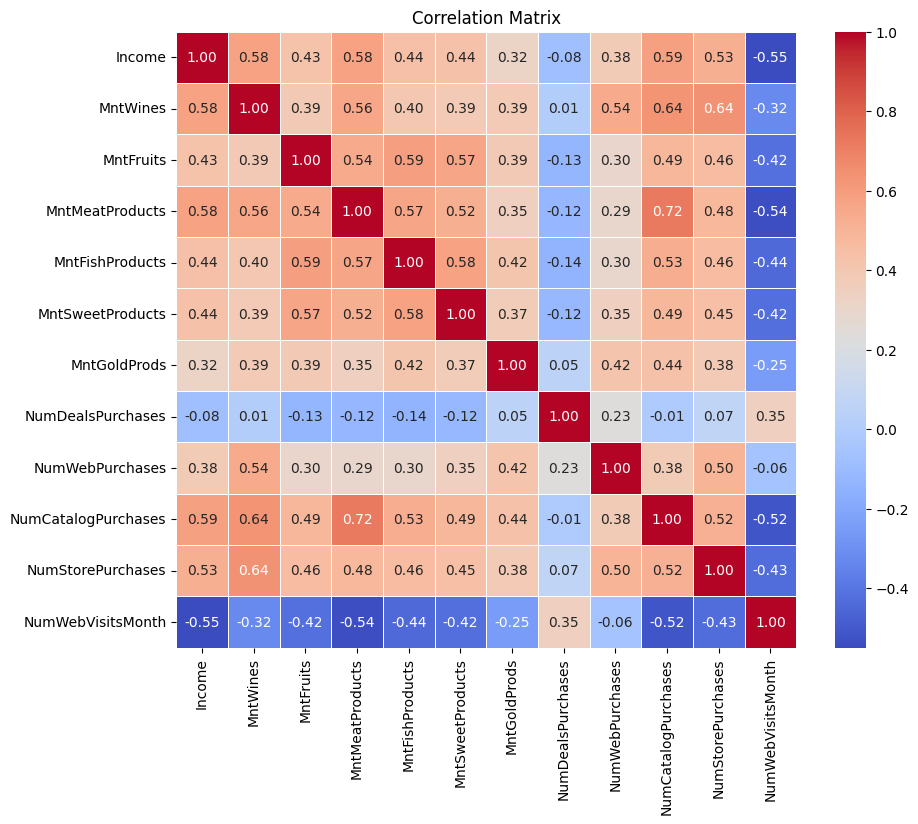

In [21]:
# Compute the correlation matrix
correlation_matrix = df[['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 
                          'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                          'NumStorePurchases', 'NumWebVisitsMonth']].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [22]:
## Clustering

Text(0, 0.5, 'SSE')

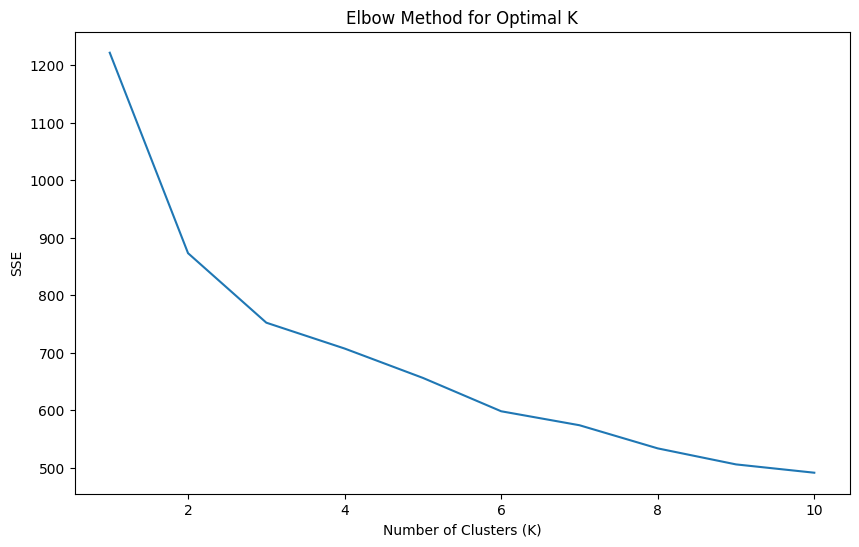

In [23]:
## K-Means Clustering Elbow Method
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')
     

In [24]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is:", kneedle.elbow)

The best k for your model is: 3


In [25]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(scaled_df)
y_pred

array([2, 1, 2, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 0, 1,
       1, 2, 1, 1, 1, 0, 0, 2, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 0, 0, 2, 1,
       1, 2, 0, 0, 2, 1, 2, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0,
       2, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 2,
       2, 2, 0, 2, 1, 1, 2, 2, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 2, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2,
       2, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2,
       2, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 0, 2,
       1, 2, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 2,
       1, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1,
       2, 0, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 0, 1,

In [26]:
scaled_df['Cluster'] = y_pred

In [27]:
# Inverse transform the scaled data
inversed_data = scaler.inverse_transform(scaled_df.drop(columns=['Cluster'], errors='ignore'))

# Convert the inversed data to a DataFrame and add column names from the original scaled data
inversed_df = pd.DataFrame(inversed_data, columns=scaled_df.drop(columns=['Cluster'], errors='ignore').columns)

# Add the KMeans labels (from the kmeans clustering step)
inversed_df['KMeans'] = kmeans.labels_

# Display the first few rows of the inversed DataFrame
inversed_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,KMeans
0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,2
1,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,1
2,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,2
3,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,1
4,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,1


In [28]:
cluster_summary = inversed_df.groupby('KMeans').agg({
    'Income': ['mean', 'min', 'max'],
    'Kidhome': ['mean', 'min', 'max'],
    'Teenhome': ['mean', 'min', 'max'],
    'Recency': ['mean', 'min', 'max'],
    'MntWines': ['mean', 'min', 'max'],
    'MntFruits': ['mean', 'min', 'max'],
    'MntMeatProducts': ['mean', 'min', 'max'],
    'MntFishProducts': ['mean', 'min', 'max'],
    'MntSweetProducts': ['mean', 'min', 'max'],
    'MntGoldProds': ['mean', 'min', 'max'],
    'NumDealsPurchases': ['mean', 'min', 'max'],
    'NumWebPurchases': ['mean', 'min', 'max'],
    'NumCatalogPurchases': ['mean', 'min', 'max'],
    'NumStorePurchases': ['mean', 'min', 'max'],
    'NumWebVisitsMonth': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.rename_axis("KMeans")

cluster_summary_transposed = cluster_summary.T

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

cluster_summary_transposed


KMeans                        Cluster 0      Cluster 1      Cluster 2
Income              mean   56261.012030   35346.449499   73805.552701
                    min     4428.000000    1730.000000   22507.000000
                    max   157243.000000  666666.000000  160803.000000
Kidhome             mean       0.125581       0.916667       0.053883
                    min        0.000000       0.000000       0.000000
                    max        1.000000       2.000000       1.000000
Teenhome            mean       1.065116       0.360417       0.156894
                    min        0.000000       0.000000       0.000000
                    max        2.000000       2.000000       2.000000
Recency             mean      49.325581      49.037500      49.131537
                    min        0.000000       0.000000       0.000000
                    max       99.000000      99.000000      99.000000
MntWines            mean     398.215504      49.083333     595.074485
                    min        3.000000       0.000000       1.000000
                    max     1492.000000     746.000000    1493.000000
MntFruits           mean      16.641860       5.837500      67.201268
                    min        0.000000       0.000000       0.000000
                    max      138.000000     123.000000     199.000000
MntMeatProducts     mean     117.320930      31.689583     423.374010
                    min        2.000000       0.000000       3.000000
                    max     1582.000000    1725.000000    1725.000000
MntFishProducts     mean      21.624806       7.934375      98.372425
                    min        0.000000       0.000000       0.000000
                    max      188.000000     102.000000     259.000000
MntSweetProducts    mean      18.804651       6.050000      67.538827
                    min        0.000000       0.000000       0.000000
                    max      195.000000     263.000000     262.000000
MntGoldProds        mean      50.979845      17.906250      76.141046
                    min        0.000000       0.000000       0.000000
                    max      321.000000     362.000000     249.000000
NumDealsPurchases   mean       3.246512       2.322917       1.378764
                    min        0.000000       0.000000       0.000000
                    max       15.000000      15.000000      15.000000
NumWebPurchases     mean       5.375194       2.370833       5.366086
                    min        0.000000       0.000000       0.000000
                    max       25.000000      27.000000      27.000000
NumCatalogPurchases mean       2.781395       0.640625       5.605388
                    min        0.000000       0.000000       0.000000
                    max       22.000000      28.000000      28.000000
NumStorePurchases   mean       6.832558       3.273958       8.549921
                    min        0.000000       0.000000       0.000000
                    max       13.000000      11.000000      13.000000
NumWebVisitsMonth   mean       5.480620       6.651042       3.122029
                    min        0.000000       0.000000       0.000000
                    max        9.000000      20.000000       9.000000

In [29]:
inversed_df['KMeans'].value_counts().sort_index()

KMeans
0    645
1    960
2    631
Name: count, dtype: int64

In [30]:
# Cluster Interpretation
print("\n--- Cluster Interpretation ---\n")

# Cluster 0 Interpretation
print("**Cluster 0: Middle-Income, Moderate Consumption, Balanced Family Size**")
print(f"- Average Income: {56261:.2f} (Moderate income group)")
print(f"- Family Composition: {0.13:.2f} kids on average, {1.07:.2f} teenagers on average")
print(f"- Recency: Average recency score = 49.33 (Moderate recent activity)")
print(f"- Spending Habits: Moderate spending on Wine ({398.22}), Meat ({117.32}), Fruits ({16.64})")
print(f"- Purchase Frequency: Moderate number of Deals Purchases (3.25), Store Purchases (6.83), Web Purchases (5.38)")
print(f"- Preference: Balanced preference between online and in-store shopping.\n")

# Cluster 1 Interpretation
print("**Cluster 1: Lower-Income, Larger Families, Infrequent Purchases**")
print(f"- Average Income: {35346:.2f} (Lower income group)")
print(f"- Family Composition: {0.92:.2f} kids on average, {0.36:.2f} teenagers on average")
print(f"- Recency: Average recency score = 49.04 (Moderate recent activity)")
print(f"- Spending Habits: Low spending on Wine ({49.08}), Meat ({31.69}), Fruits ({5.84})")
print(f"- Purchase Frequency: Lower frequency of online purchases (2.37), moderate in-store purchases (3.27), and moderate deals usage (2.32)")
print(f"- Preference: Strong preference for in-store shopping, less engagement with online shopping.\n")

# Cluster 2 Interpretation
print("**Cluster 2: High-Income, Minimal Family Size, Frequent Online and Store Purchases**")
print(f"- Average Income: {73805:.2f} (High-income group)")
print(f"- Family Composition: {0.05:.2f} kids on average, {0.16:.2f} teenagers on average (mostly small families)")
print(f"- Recency: Average recency score = 49.13 (Moderate recent activity)")
print(f"- Spending Habits: High spending on Wine ({595.07}), Meat ({423.37}), Fruits ({67.20})")
print(f"- Purchase Frequency: High frequency of in-store purchases (8.55), moderate online purchases (5.37), low deals usage (1.38)")
print(f"- Preference: Preference for high-end products (wine, meat), frequent in both online and in-store shopping.\n")

# Summary
print("\n--- Summary ---")
print("Each cluster shows distinct preferences and behaviors:")
print("1. Cluster 0: Middle-income, moderate spending, balanced family sizes with a mix of online and in-store shopping.")
print("2. Cluster 1: Lower-income, larger families with a focus on in-store shopping and limited online activity.")
print("3. Cluster 2: High-income, small families with a preference for premium products and frequent purchases online and in-store.")




--- Cluster Interpretation ---

**Cluster 0: Middle-Income, Moderate Consumption, Balanced Family Size**
- Average Income: 56261.00 (Moderate income group)
- Family Composition: 0.13 kids on average, 1.07 teenagers on average
- Recency: Average recency score = 49.33 (Moderate recent activity)
- Spending Habits: Moderate spending on Wine (398.22), Meat (117.32), Fruits (16.64)
- Purchase Frequency: Moderate number of Deals Purchases (3.25), Store Purchases (6.83), Web Purchases (5.38)
- Preference: Balanced preference between online and in-store shopping.

**Cluster 1: Lower-Income, Larger Families, Infrequent Purchases**
- Average Income: 35346.00 (Lower income group)
- Family Composition: 0.92 kids on average, 0.36 teenagers on average
- Recency: Average recency score = 49.04 (Moderate recent activity)
- Spending Habits: Low spending on Wine (49.08), Meat (31.69), Fruits (5.84)
- Purchase Frequency: Lower frequency of online purchases (2.37), moderate in-store purchases (3.27), and m

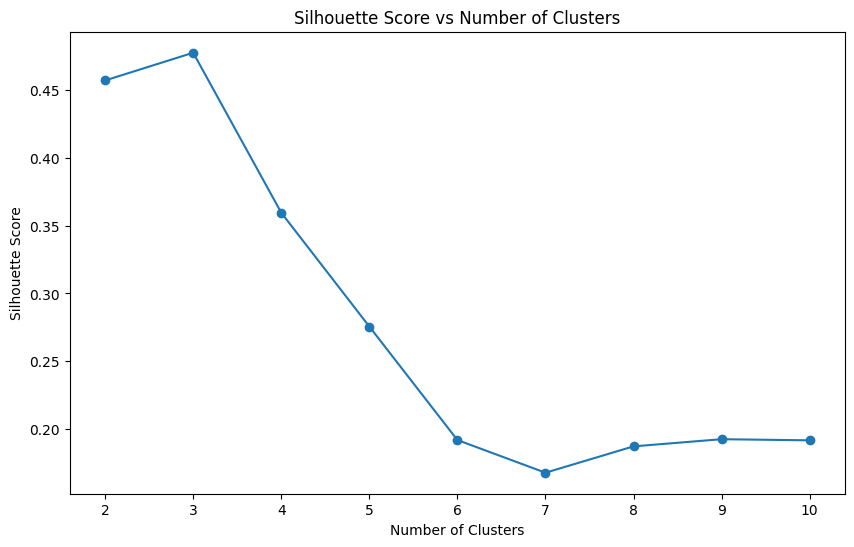

In [31]:
## Hierarchical Clustering Agglomerative Method
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    agglomerative = AgglomerativeClustering(n_clusters=k, linkage='ward')
    cluster_labels = agglomerative.fit_predict(scaled_df)

    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [32]:
hc = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(scaled_df)

In [33]:
inversed_df['Agglo'] = y_hc
inversed_df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,KMeans,Agglo
0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,2,1
1,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,1,0
2,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,2,1
3,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,1,0
4,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,1,0


In [34]:
cluster_summary = inversed_df.groupby(y_hc).agg({
    'Income': ['mean', 'min', 'max'],
    'Kidhome': ['mean', 'min', 'max'],
    'Teenhome': ['mean', 'min', 'max'],
    'Recency': ['mean', 'min', 'max'],
    'MntWines': ['mean', 'min', 'max'],
    'MntFruits': ['mean', 'min', 'max'],
    'MntMeatProducts': ['mean', 'min', 'max'],
    'MntFishProducts': ['mean', 'min', 'max'],
    'MntSweetProducts': ['mean', 'min', 'max'],
    'MntGoldProds': ['mean', 'min', 'max'],
    'NumDealsPurchases': ['mean', 'min', 'max'],
    'NumWebPurchases': ['mean', 'min', 'max'],
    'NumCatalogPurchases': ['mean', 'min', 'max'],
    'NumStorePurchases': ['mean', 'min', 'max'],
    'NumWebVisitsMonth': ['mean', 'min', 'max']
})

# Rename the index axis (this will be the KMeans column)
cluster_summary = cluster_summary.rename_axis("Agglo")

# Transpose the result to make each feature (Income, Kidhome, etc.) as rows and clusters as columns
cluster_summary_transposed = cluster_summary.T

# Add a "Cluster " label in front of each column name
new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="Agglo")

# Display the transposed summary
cluster_summary_transposed


Agglo                         Cluster 0      Cluster 1
Income              mean   43938.201044   73470.733685
                    min     1730.000000   22507.000000
                    max   666666.000000  105471.000000
Kidhome             mean       0.597637       0.054140
                    min        0.000000       0.000000
                    max        2.000000       1.000000
Teenhome            mean       0.642413       0.157643
                    min        0.000000       0.000000
                    max        2.000000       2.000000
Recency             mean      49.088308      49.297771
                    min        0.000000       0.000000
                    max       99.000000      99.000000
MntWines            mean     189.074005     597.818471
                    min        0.000000       7.000000
                    max     1492.000000    1493.000000
MntFruits           mean      10.171642      67.493631
                    min        0.000000       0.000000
                    max      138.000000     199.000000
MntMeatProducts     mean      68.062189     420.062102
                    min        0.000000      38.000000
                    max     1725.000000     984.000000
MntFishProducts     mean      13.423507      98.810510
                    min        0.000000       0.000000
                    max      188.000000     259.000000
MntSweetProducts    mean      11.320274      67.437898
                    min        0.000000       0.000000
                    max      263.000000     198.000000
MntGoldProds        mean      31.144279      76.492038
                    min        0.000000       0.000000
                    max      362.000000     249.000000
NumDealsPurchases   mean       2.698383       1.361465
                    min        0.000000       0.000000
                    max       15.000000      13.000000
NumWebPurchases     mean       3.588308       5.348726
                    min        0.000000       1.000000
                    max       27.000000      11.000000
NumCatalogPurchases mean       1.532960       5.542994
                    min        0.000000       1.000000
                    max       28.000000      11.000000
NumStorePurchases   mean       4.695896       8.589172
                    min        0.000000       3.000000
                    max       13.000000      13.000000
NumWebVisitsMonth   mean       6.170398       3.133758
                    min        0.000000       0.000000
                    max       20.000000       9.000000

In [35]:
inversed_df['Agglo'].value_counts().sort_index()

Agglo
0    1608
1     628
Name: count, dtype: int64

In [36]:
# Agglomerative Clustering Interpretation
print("\n--- Agglomerative Clustering Interpretation ---\n")

# Cluster 0 Interpretation
print("**Cluster 0: Mid-to-Low Income, Larger Families, Moderate Spending on Basic Products**")
print(f"- Average Income: {43938.20:.2f} (Mid-to-low income group, range from 1730 to 666666)")
print(f"- Family Composition: {0.60:.2f} kids on average, {0.64:.2f} teenagers on average (Moderate family size)")
print(f"- Recency: Average recency score = 49.09 (Moderate recent activity with the brand/product)")
print(f"- Spending Habits: Moderate spending on Wine ({189.07}), Meat ({68.06}), Fruits ({10.17})")
print(f"- Purchase Frequency: Moderate frequency of Deals Purchases (2.70), Web Purchases (3.59), Store Purchases (4.70)")
print(f"- Preference: Balanced between online and in-store shopping, with moderate use of deals and discounts.\n")

# Cluster 1 Interpretation
print("**Cluster 1: High-Income, Smaller Families, Premium Product Buyers**")
print(f"- Average Income: {73470.73:.2f} (High-income group, range from 22507 to 105471)")
print(f"- Family Composition: {0.05:.2f} kids on average, {0.16:.2f} teenagers on average (Small families, minimal children)")
print(f"- Recency: Average recency score = 49.30 (Similar recent engagement with the brand/product)")
print(f"- Spending Habits: High spending on Wine ({597.82}), Meat ({420.06}), Fruits ({67.49})")
print(f"- Purchase Frequency: Higher frequency of Web Purchases (5.35), Catalog Purchases (5.54), and Store Purchases (8.59)")
print(f"- Preference: Strong focus on premium products, with a heavier inclination toward online and catalog shopping.\n")

# Summary
print("\n--- Summary ---")
print("The two clusters show distinct patterns of income, family composition, and purchasing behavior:")
print("1. **Cluster 0**: Middle-to-lower-income group with larger families, moderate spending on basic items like food and drinks, balanced between in-store and online shopping.")
print("2. **Cluster 1**: High-income group with smaller families, high spending on premium items like wine and meat, with a preference for online and catalog purchases.")



--- Agglomerative Clustering Interpretation ---

**Cluster 0: Mid-to-Low Income, Larger Families, Moderate Spending on Basic Products**
- Average Income: 43938.20 (Mid-to-low income group, range from 1730 to 666666)
- Family Composition: 0.60 kids on average, 0.64 teenagers on average (Moderate family size)
- Recency: Average recency score = 49.09 (Moderate recent activity with the brand/product)
- Spending Habits: Moderate spending on Wine (189.07), Meat (68.06), Fruits (10.17)
- Purchase Frequency: Moderate frequency of Deals Purchases (2.70), Web Purchases (3.59), Store Purchases (4.70)
- Preference: Balanced between online and in-store shopping, with moderate use of deals and discounts.

**Cluster 1: High-Income, Smaller Families, Premium Product Buyers**
- Average Income: 73470.73 (High-income group, range from 22507 to 105471)
- Family Composition: 0.05 kids on average, 0.16 teenagers on average (Small families, minimal children)
- Recency: Average recency score = 49.30 (Similar

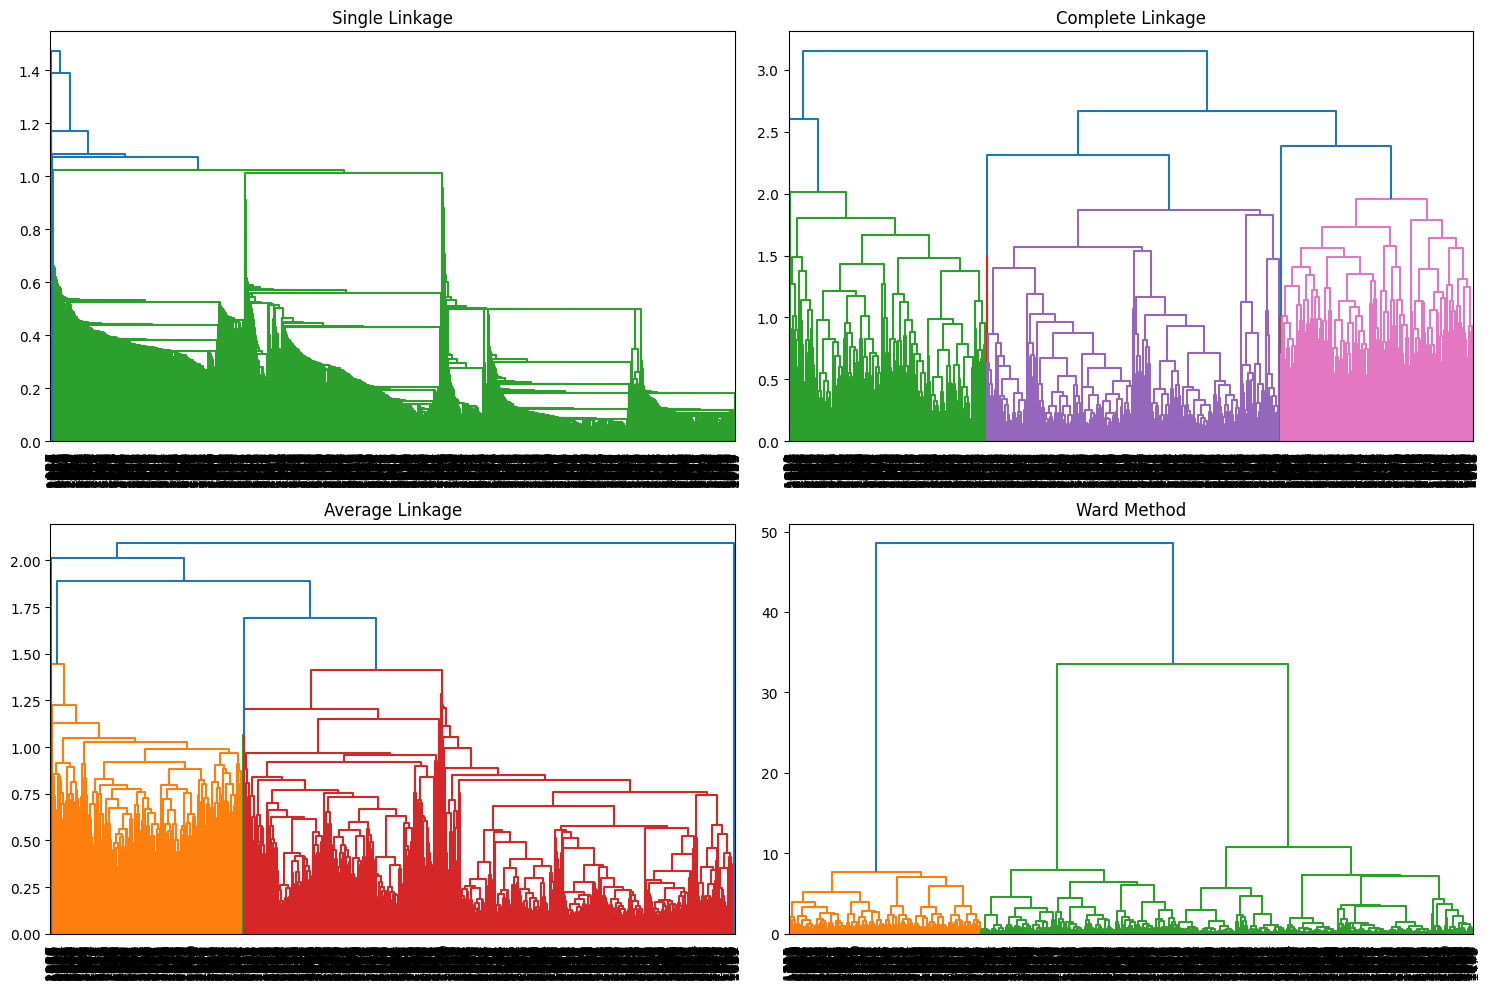

In [39]:
linkage_methods = {
    "Single Linkage": "single",
    "Complete Linkage": "complete",
    "Average Linkage": "average",
    "Ward Method": "ward"
}

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, (title, method) in enumerate(linkage_methods.items()):
    linked = linkage(scaled_df, method=method)
    dendrogram(linked, ax=axes[i], leaf_rotation=90, leaf_font_size=10)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()